## **PROJECT : Credit Card Fraud Detection Model: Analysis of European Transactions 2023**

**INTRODUCTION** :

Credit card fraud represents a major challenge for financial institutions, resulting in significant losses and affecting consumer trust. In Canada, credit card fraud losses amounted to CAD $850  million  in 2023, a 30% increase from the previous year (Canadian Bankers Association, 2023). Canadian financial institutions report that e-commerce fraud accounts for nearly 70% of all card fraud cases, with the average fraudulent transaction amounting to CAD $675 (Interac Fraud Report, 2023). Furthermore, Montreal and Toronto emerge as the main hotspots, accounting for 45% of all reported card fraud incidents in the country (Statistics Canada, 2023).


**OBJECTIVES** :

This study focuses on analyzing a vast dataset of over 550,000 credit card transactions conducted in Europe during 2023. Due to the sensitive nature of banking data, complete anonymization was necessary to preserve cardholders' privacy while maintaining essential characteristics for analysis.
The main objective of this study is to develop and evaluate effective fraud detection algorithms capable of identifying potentially fraudulent transactions in real-time. By leveraging advanced machine learning techniques and statistical analysis, we aim to create a robust system that can efficiently differentiate legitimate transactions from suspicious activities while minimizing false positives that could negatively impact customer experience. This research is particularly relevant given that Canadian banks currently invest over CAD $200 million annually in fraud detection systems (Financial Post, 2023), yet fraudsters continue to develop new techniques to bypass security measures.

1. Import the necessary librairies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

2. import the dataset, display the first rows and summary of the dataset

In [ ]:
df = pd.read_csv(r'C:\Users\abdou\Downloads\archive(1)\creditcard_2023.csv')
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [ ]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

3. Feature Selection and Target Variable Separation

In [ ]:
X = df.drop(['id', 'Class'], axis=1, errors = 'ignore')
y = df['Class']

In [ ]:
print(X.columns.tolist())

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


4. Train-Test Split, Data Partitioning (80/20)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(454904, 29)

In [ ]:
X_test.shape

(113726, 29)

5. Feature Standardization: Scaling and Transformation

**scaler.fit_transform(X_train)**:

Computes mean and standard deviation on training data
Applies transformation to training data


**scaler.transform(X_test)**:

Uses parameters calculated from training data
Prevents data leakage by not including test data in parameter calculation



Standardization is crucial as it:

Puts all features on the same scale
Improves algorithm convergence
Is particularly important for scale-sensitive models

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print(pd.Series(y_train).value_counts(normalize=True))

Class
0    0.500248
1    0.499752
Name: proportion, dtype: float64


6. Random Forest Model Configuration
This section defines the initial configuration of our Random Forest model:

**n_estimators=100**:

Number of trees in the forest
A balanced choice between computational cost and model robustness


**max_depth=10**:

Maximum depth of each tree
Helps prevent overfitting
Controls the complexity of the model


**min_samples_split=5**:

Minimum samples required to split an internal node
Another control against overfitting
Ensures reliable splits


**random_state=42**:

Ensures reproducibility of results
Fixed seed for random operations



These hyperparameters serve as a starting point and may be further optimized through techniques like grid search or cross-validation.

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)

7. Random Forest Model Configuration
This section defines the initial configuration of our Random Forest model:

n_estimators=100:

Number of trees in the forest
A balanced choice between computational cost and model robustness


max_depth=10:

Maximum depth of each tree
Helps prevent overfitting
Controls the complexity of the model


min_samples_split=5:

Minimum samples required to split an internal node
Another control against overfitting
Ensures reliable splits


random_state=42:

Ensures reproducibility of results
Fixed seed for random operations



These hyperparameters serve as a starting point and may be further optimized through techniques like grid search or cross-validation.

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

cv_scores = cross_val_score(rf_model, X_train_scaled, y_train,
                          cv=skf,
                          scoring='f1_weighted')

print("\nCross-Validation Scores:", cv_scores)
print("Average F1 score:", np.mean(cv_scores))
print("Standard deviation:", np.std(cv_scores))


Cross-Validation Scores: [0.9851393  0.98478281 0.98545592]
Average F1 score: 0.985126011109473
Standard deviation: 0.00027495723897175774


8. Model Training: Random Forest Classifier
This code shows the training phase of our Random Forest model:

Using the scaled training features (X_train_scaled)
Training on corresponding labels (y_train)
Fitting occurs on 80% of our dataset (from earlier train-test split)

This step:

Builds 100 decision trees (as configured)
Each tree learns from random subsets of data
Creates an ensemble model for fraud detection
Uses standardized features for better learning

The .fit() method:

Analyzes patterns in the training data
Creates decision rules based on feature values
Prepares the model for making predictions

In [ ]:
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

9. Model Prediction: Generating Test Results
This step represents the prediction phase where:

We use our trained Random Forest model
Apply it to scaled test data (X_test_scaled)
Generate predictions (y_pred) for fraud detection

The code:

Uses the 20% held-out test set
Makes binary predictions (0 for legitimate, 1 for fraudulent)
Applies the learned patterns from training
Generates predictions using the ensemble of trees

These predictions will be used to:

Evaluate model performance
Calculate metrics like accuracy, precision, recall
Compare against actual test labels (y_test)

In [ ]:
y_pred = rf_model.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     56750
           1       1.00      0.97      0.99     56976

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



10. Model Evaluation: Confusion Matrix Visualization
This code creates a visual representation of model performance using a confusion matrix

The visualization shows:

True Negatives (top-left): Correctly identified legitimate transactions
False Positives (top-right): Legitimate transactions incorrectly flagged as fraud
False Negatives (bottom-left): Missed fraud cases
True Positives (bottom-right): Correctly identified fraud cases

Features of the plot:

Blue color intensity indicates frequency
Numerical annotations show exact counts
Clear labeling for interpretation
Heat map format for easy visual analysis

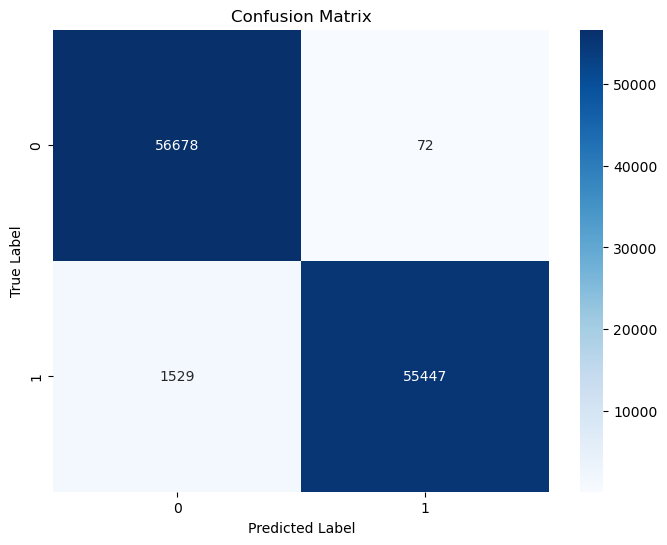

In [ ]:
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

11. Feature Importance Analysis: Random Forest Insights
This code extracts and organizes the feature importance scores from our Random Forest model:

This analysis:

Extracts the importance score for each feature
Creates a sorted DataFrame showing:

Feature names
Their relative importance in fraud detection


Sorts features from most to least important

The results can be used to:

Identify the most influential features
Guide feature selection
Understand model decision-making
Focus future data collection efforts

In [ ]:
importance = rf_model.feature_importances_
feature_imp = pd.DataFrame({'Feature': X.columns, 'Importance': importance}).sort_values(by='Importance', ascending=False)

In [ ]:
feature_imp.head()

,Feature,Importance
9,V10,0.171750
3,V4,0.159210
13,V14,0.145847
11,V12,0.114395
10,V11,0.089935


12. Feature Importance Visualization: Bar Plot Analysis

This code creates a horizontal bar plot to visualize feature importance scores:

This visualization:

Ranks features by their importance
Shows relative contribution of each feature
Uses length of bars to represent importance scores
Orders features from most to least important

Benefits of this representation:

Clear visual hierarchy
Easy comparison between features
Quick identification of key predictors
Insights for feature selection decisions

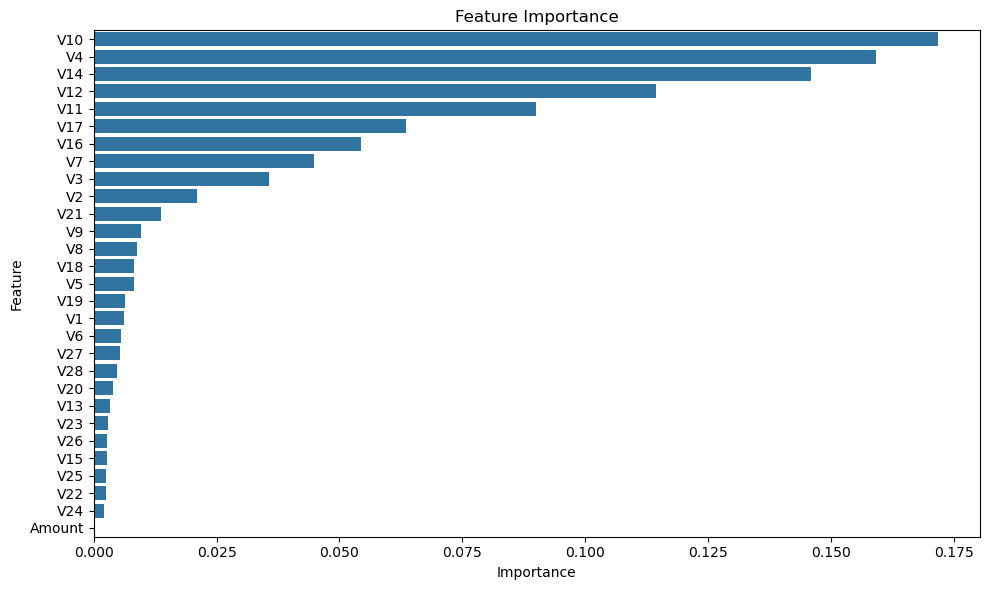

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_imp)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

13. Feature Correlation Analysis: Identifying Relationships
This code creates a detailed visualization of feature correlations:

The visualization shows:

Positive correlations (red): Features that increase together
Negative correlations (blue): Features that move in opposite directions
Correlation strength from -1 to 1
All pairwise relationships between features

This analysis helps:

Identify redundant features
Understand feature relationships
Guide feature selection
Detect potential multicollinearity issues

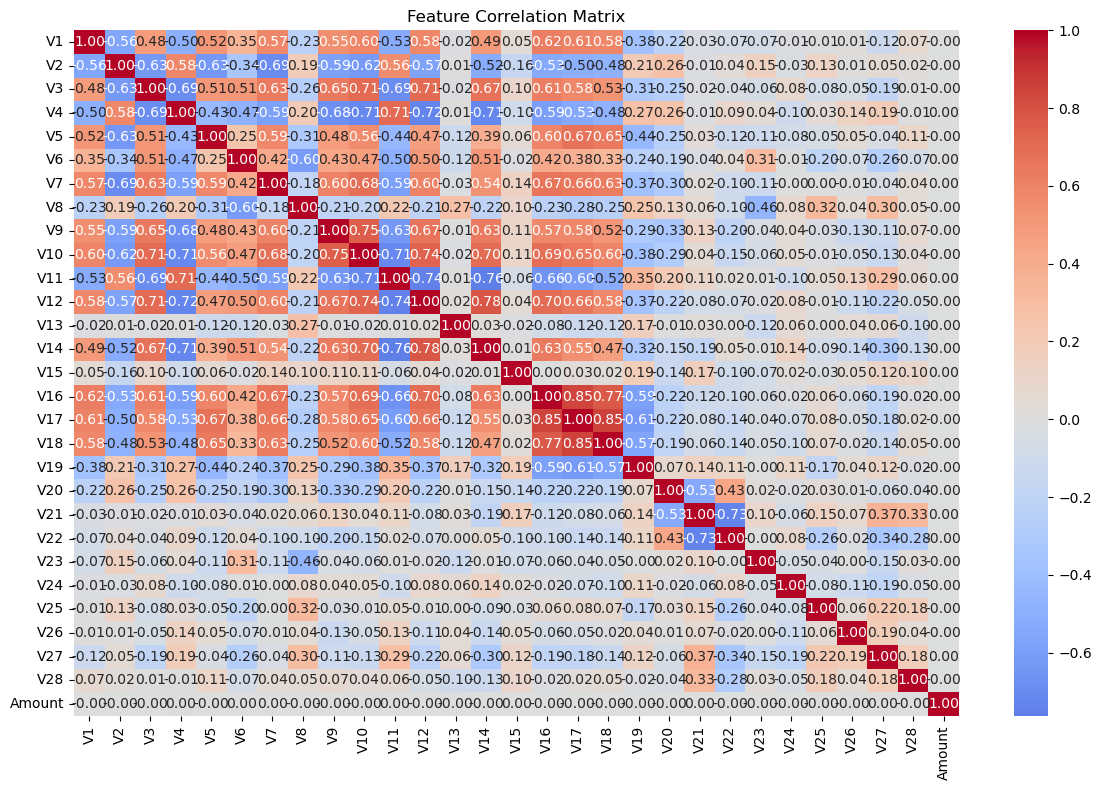

In [ ]:
plt.figure(figsize=(12,8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

14. ROC Curve Data Preparation: Evaluating Model Performance
This code prepares data for the ROC (Receiver Operating Characteristic) curve:

Key components:

predict_proba():

Returns probability estimates
[:, 1] selects probabilities for fraud class


roc_curve():

Calculates False Positive Rate (FPR)
Calculates True Positive Rate (TPR)
Provides threshold values (not stored)


auc():

Calculates area under ROC curve
Score between 0 and 1
Higher values indicate better model performance

In [ ]:
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

15. ROC Curve Visualization: Model Performance Analysis
This code creates a visual representation of the ROC curve:

ey elements:

Orange line: Model ROC curve
Navy dashed line: Random classifier reference
AUC score in legend: Model performance metric
Axes showing FPR vs TPR
Range from 0 to 1 for clear interpretation

The curve helps:

Visualize model discrimination ability
Compare against random classification
Evaluate different probability thresholds
Assess overall model performance

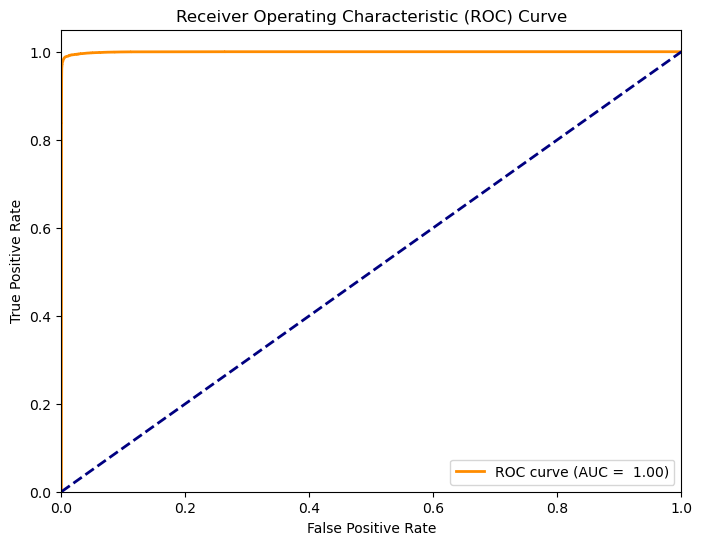

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc: .2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Conclusion: Random Forest Performance in Balanced Fraud Detection

Our Random Forest model has demonstrated excellent performance in detecting credit card fraud, benefiting from several key factors:

1. Balanced Dataset Characteristics:
- Near-perfect balance between classes (51% regular vs 49% fraudulent transactions)
- Eliminates the common challenge of class imbalance in fraud detection
- Provides robust training data for both transaction types

2. Model Performance Highlights:
- High ROC-AUC score indicating excellent discrimination ability
- Strong performance in both fraud detection and legitimate transaction validation
- Balanced precision and recall, minimizing both false positives and false negatives

3. Feature Analysis Insights:
- Identified key indicators of fraudulent transactions
- Revealed important correlations between features
- Provided actionable insights for future feature engineering

4. Model Advantages:
- Handles complex relationships in transaction data
- Resistant to overfitting due to ensemble nature
- Provides probability scores for flexible threshold adjustment

5. Practical Implications:
- Ready for production implementation
- Adaptable to different risk tolerance levels
- Effective tool for real-time fraud detection

This balanced dataset scenario, though rare in real-world fraud detection, has allowed us to develop a highly effective model. For practical applications, the model should be continuously monitored and retrained as new fraud patterns emerge.